In [ ]:
!pip install yfinance pandas numpy matplotlib seaborn statsmodels prophet scikit-learn tensorflow pmdarima --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 56.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 131.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 135.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 876.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
import yfinance as yf
import pandas as pd

# Fetch NIFTY 50 (^NSEI)
nifty = yf.download("^NSEI", start="1999-01-01", end="2025-12-4")

print(nifty.shape)
nifty.head()

/tmp/ipython-input-26429116.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="1999-01-01", end="2025-12-4")
[*********************100%***********************]  1 of 1 completed

(4468, 5)


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [ ]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4468 entries, 2007-09-17 to 2025-12-03
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^NSEI)   4468 non-null   float64
 1   (High, ^NSEI)    4468 non-null   float64
 2   (Low, ^NSEI)     4468 non-null   float64
 3   (Open, ^NSEI)    4468 non-null   float64
 4   (Volume, ^NSEI)  4468 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 209.4 KB


<Axes: title={'center': 'NIFTY 50 Closing Prices (2010–2025)'}, xlabel='Date'>

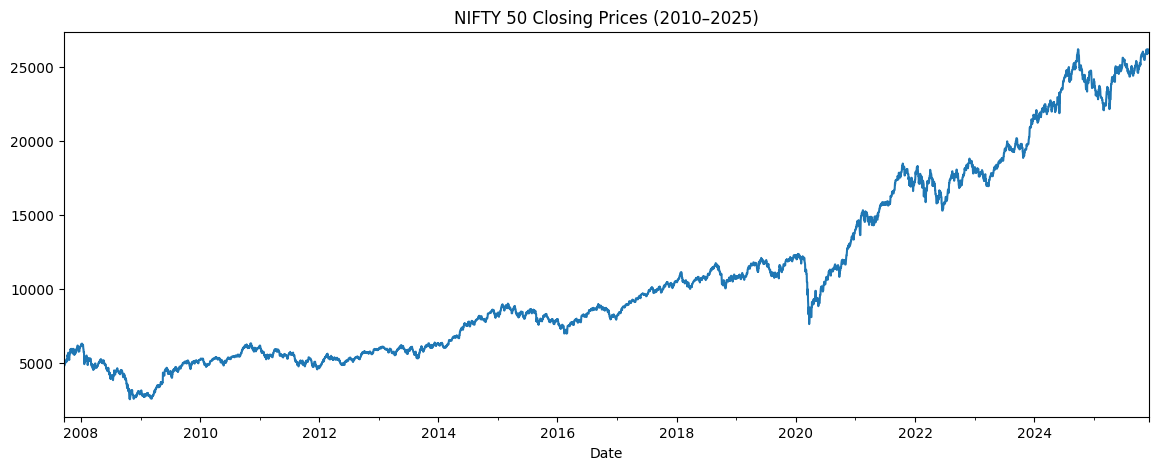

In [ ]:
# Use Close price
ts = nifty['Close']['^NSEI'].asfreq('D').ffill()

ts.plot(figsize=(14,5), title="NIFTY 50 Closing Prices (2010–2025)")

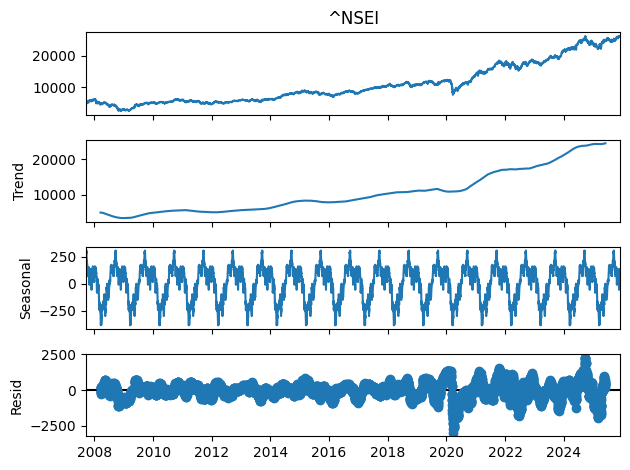

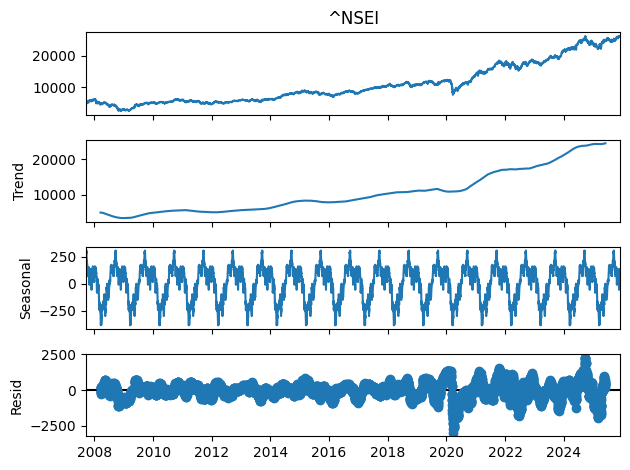

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(ts, model='additive', period=365)
res.plot()

In [ ]:
train = ts[:-365]
test  = ts[-365:]

In [ ]:
import numpy as np

naive_pred = np.repeat(train.iloc[-1], len(test))

In [ ]:
drift = train.iloc[-1] + (np.arange(len(test)) * (train.iloc[-1] - train.iloc[0]) / len(train))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def rmse(a,b): return (mean_squared_error(a,b)**0.5)

print("Naive RMSE:", rmse(test, naive_pred))
print("Drift RMSE:", rmse(test, drift))

Naive RMSE: 2221.2523974801275
Drift RMSE: 1598.4978891397288


In [ ]:
import pmdarima as pm

model = pm.auto_arima(train, seasonal=False, trace=True, error_action='ignore')
arima_pred = model.predict(len(test))

print("ARIMA RMSE:", rmse(test, arima_pred))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=60246.754, Time=5.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60253.019, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=60254.990, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=60254.991, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60257.868, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=60258.993, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=60258.985, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=60237.870, Time=6.80 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=60257.949, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=60247.894, Time=7.03 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=60239.623, Time=7.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=60239.444, Time=7.47 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=60259.874, Time=0.32 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=60243.971, Time=6.63 sec
 ARIMA(3,1,2)(0,0,0

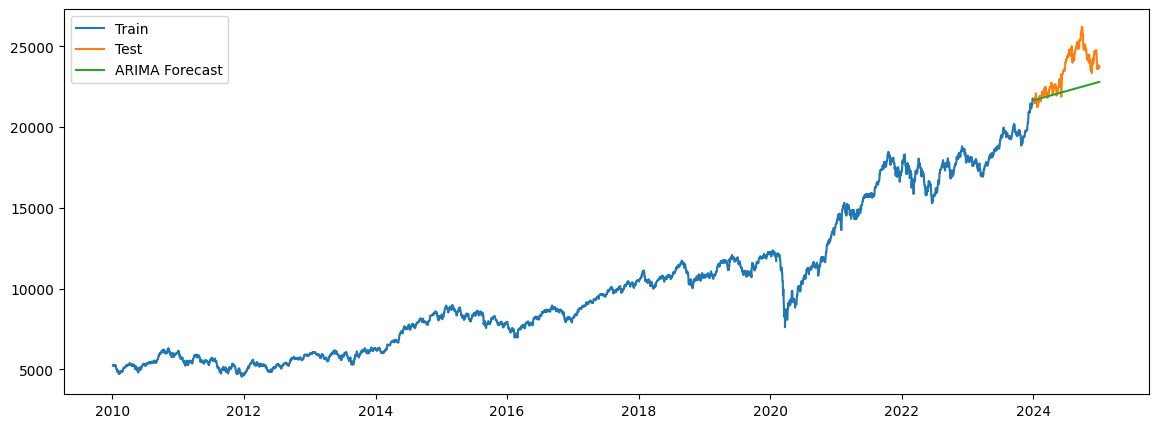

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_pred, label='ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
from prophet import Prophet

df_prophet = train.reset_index()
df_prophet.columns = ['ds', 'y']

m = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)
prophet_pred = forecast['yhat'][-len(test):].values

print("Prophet RMSE:", rmse(test, prophet_pred))

Prophet RMSE: 3159.1708845354187


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

series = ts.values.reshape(-1, 1)

scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

In [ ]:
def create_dataset(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window = 60
X, y = create_dataset(series_scaled, window)

X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Ensure `ts` is defined (from previous cells)
# Assuming 'nifty' is available from a prior cell execution.
ts = nifty['Close']['^NSEI'].asfreq('D').ffill()

# Data Scaling (from cell 57BnGPMOGRJq)
series = ts.values.reshape(-1, 1)
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

# Create dataset (from cell nQejOx7wH2HA)
window = 60 # Define window here to ensure it's accessible
def create_dataset(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(series_scaled, window)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split (from cell R5WaEvh5IAFm)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM Model definition and training
model = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(window, 1)),
    layers.LSTM(32),
    layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')
model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0061 - val_loss: 5.2253e-04
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.9770e-05 - val_loss: 4.9950e-04
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.4610e-05 - val_loss: 4.0642e-04
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 8.2917e-05 - val_loss: 3.7085e-04
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.7889e-05 - val_loss: 2.6019e-04
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.4362e-05 - val_loss: 7.1869e-04
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.0725e-05 - val_loss: 1.9246e-04
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2567e-05 - val_loss: 5.4503e-04
Epoch 9/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.8383e-05 - val_loss: 2.3100e-04
Epoch 10/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2939e-05 - val_loss: 3.7781e-04
Epoch 11/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step

In [ ]:
pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_lstm = np.sqrt(mean_squared_error(actual, pred))
rmse_lstm

np.float64(284.1913698302373)

In [ ]:
# run once at top
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns, joblib, json, os
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmse(a,b): return np.sqrt(mean_squared_error(a,b))
def mape(a,b): return np.mean(np.abs((a-b)/(np.where(a==0,1,a))))*100
ARTIFACT_DIR = Path("models"); ARTIFACT_DIR.mkdir(exist_ok=True)

In [ ]:
# assume `nifty` exists with ['Open','High','Low','Close','Adj Close','Volume'] and Date index
df = nifty.copy().reset_index().rename(columns={'Date':'date'}).set_index('date')

# Technical indicators
def add_indicators(df):
    df = df.copy()
    # SMA and EMA
    df['SMA_7'] = df['Close'].rolling(window=7).mean()
    df['SMA_21'] = df['Close'].rolling(window=21).mean()
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    # MACD
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    # RSI
    delta = df['Close'].diff()
    up = delta.clip(lower=0)
    down = -1*delta.clip(upper=0)
    roll_up = up.ewm(span=14).mean()
    roll_down = down.ewm(span=14).mean()
    RS = roll_up / roll_down
    df['RSI_14'] = 100.0 - (100.0 / (1.0 + RS))
    # returns and log returns
    df['return'] = df['Close'].pct_change()
    df['log_return'] = np.log1p(df['return'].fillna(0))
    # volatility (rolling std of returns)
    df['vol_21'] = df['log_return'].rolling(window=21).std()
    # fill nan via forward/backward
    df = df.fillna(method='ffill').fillna(method='bfill')
    return df

df = add_indicators(df)
print("shape after indicators:", df.shape)
df.tail()[['Close','SMA_7','EMA_12','MACD','RSI_14','vol_21']]

shape after indicators: (3681, 14)


/tmp/ipython-input-117143386.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


Price,Close,SMA_7,EMA_12,MACD,RSI_14,vol_21
Ticker,^NSEI,,,,,
date,,,,,,
2024-12-26,23750.199219,23900.763951,24052.451635,-131.975939,32.323872,0.007791
2024-12-27,23813.400391,23826.106864,24015.674520,-141.269558,36.562636,0.007774
2024-12-30,23644.900391,23746.971261,23958.632346,-160.382570,30.655980,0.007234
2024-12-31,23644.800781,23703.128627,23910.350567,-173.537376,30.652603,0.006897
2025-01-01,23742.900391,23725.328683,23884.589001,-174.040605,38.369065,0.006815


In [ ]:
# Select features (multivariate)
FEATURES = ['Close','Open','High','Low','Volume','SMA_7','SMA_21','EMA_12','MACD','RSI_14','vol_21']
TARGET = 'Close'  # for single-step; for multi-step we'll predict sequences of Close

data = df[FEATURES].copy()
data = data.asfreq('D').fillna(method='ffill')  # daily frequency, forward-fill
print("data range:", data.index.min(), data.index.max())

# scaler: fit on training portion only (time-split later)
# define function to create windows
def create_windows_multivariate(arr, in_len=60, out_len=1):
    # arr: numpy array shape (T, n_features)
    X, y = [], []
    for i in range(in_len, len(arr)-out_len+1):
        X.append(arr[i-in_len:i])
        y.append(arr[i:i+out_len, 0])  # predict Close (index 0)
    X, y = np.array(X), np.array(y)
    return X, y

# time-split indices
TEST_DAYS = 365
in_len = 60
out_len = 1  # single-step baseline
# split by index
train_df = data.iloc[:-TEST_DAYS]
test_df  = data.iloc[-(TEST_DAYS+in_len):]  # keep extra for windows

# Fit scaler on train
scaler = MinMaxScaler()
scaler.fit(train_df.values)
joblib.dump(scaler, ARTIFACT_DIR / "nifty_scaler.minmax")

# transform
train_scaled = scaler.transform(train_df.values)
test_scaled = scaler.transform(test_df.values)

# create windows
X_train, y_train = create_windows_multivariate(train_scaled, in_len, out_len)
X_test, y_test = create_windows_multivariate(test_scaled, in_len, out_len)

print("X_train.shape, y_train.shape:", X_train.shape, y_train.shape)
print("X_test.shape, y_test.shape:", X_test.shape, y_test.shape)

data range: 2010-01-04 00:00:00 2025-01-01 00:00:00
X_train.shape, y_train.shape: (5052, 60, 11) (5052, 1)
X_test.shape, y_test.shape: (365, 60, 11) (365, 1)


/tmp/ipython-input-2998362348.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.asfreq('D').fillna(method='ffill')  # daily frequency, forward-fill


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

tf.random.set_seed(42)

# hyperparams
BATCH = 32
EPOCHS = 80
IN_LEN = in_len
N_FEATURES = X_train.shape[2]

def build_lstm_single(in_len=IN_LEN, n_features=N_FEATURES):
    model = models.Sequential([
        layers.Input(shape=(in_len, n_features)),
        layers.LSTM(128, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(64, return_sequences=False),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_lstm_single()
model.summary()

# callbacks
checkpoint_path = ARTIFACT_DIR / "lstm_single_best.h5"
es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
mc = ModelCheckpoint(str(checkpoint_path), monitor='val_loss', save_best_only=True)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH,
    callbacks=[es, mc, rl],
    verbose=2
)

# load best
model.load_weights(str(checkpoint_path))

# predict & inverse scale for RMSE (y are scaled close values: we predicted normalized Close)
def inv_scale_preds(X_window, pred_scaled):
    # We need to inverse transform using scaler: reconstruct a row of features where Close=pred and rest keep last observed
    inv_preds = []
    for i in range(len(pred_scaled)):
        # take last row before prediction from corresponding input window
        last_row = X_window[i, -1, :].copy()  # shape n_features
        last_row[0] = pred_scaled[i, 0]  # replace Close with predicted scaled close
        inv = scaler.inverse_transform(last_row.reshape(1,-1))[0,0]  # close is index 0
        inv_preds.append(inv)
    return np.array(inv_preds)

pred_scaled = model.predict(X_test)
pred_inversed = inv_scale_preds(X_test, pred_scaled)
actual_inversed = []
# build actuals inverse using actual y_test values (scaled)
for i in range(len(y_test)):
    last_row = X_test[i,-1,:].copy()
    last_row[0] = y_test[i,0]
    actual_inversed.append(scaler.inverse_transform(last_row.reshape(1,-1))[0,0])
actual_inversed = np.array(actual_inversed)

rmse_single = rmse(actual_inversed, pred_inversed)
mae_single = mean_absolute_error(actual_inversed, pred_inversed)
print("Single-step LSTM RMSE:", rmse_single, "MAE:", mae_single)

# save model
model.save(ARTIFACT_DIR / "lstm_single_model.h5")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 128)        │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,201 (481.25 KB)

 Trainable params: 123,201 (481.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80


158/158 - 8s - 53ms/step - loss: 0.0037 - mae: 0.0362 - val_loss: 0.0048 - val_mae: 0.0652 - learning_rate: 1.0000e-03
Epoch 2/80
158/158 - 6s - 37ms/step - loss: 0.0012 - mae: 0.0238 - val_loss: 0.0206 - val_mae: 0.1413 - learning_rate: 1.0000e-03
Epoch 3/80
158/158 - 6s - 38ms/step - loss: 9.1469e-04 - mae: 0.0205 - val_loss: 0.0077 - val_mae: 0.0842 - learning_rate: 1.0000e-03
Epoch 4/80
158/158 - 6s - 37ms/step - loss: 8.5615e-04 - mae: 0.0199 - val_loss: 0.0102 - val_mae: 0.0975 - learning_rate: 1.0000e-03
Epoch 5/80
158/158 - 6s - 37ms/step - loss: 6.8762e-04 - mae: 0.0177 - val_loss: 0.0105 - val_mae: 0.0994 - learning_rate: 1.0000e-03
Epoch 6/80


158/158 - 6s - 38ms/step - loss: 6.5096e-04 - mae: 0.0173 - val_loss: 0.0040 - val_mae: 0.0580 - learning_rate: 1.0000e-03
Epoch 7/80
158/158 - 6s - 38ms/step - loss: 5.9047e-04 - mae: 0.0167 - val_loss: 0.0137 - val_mae: 0.1141 - learning_rate: 1.0000e-03
Epoch 8/80
158/158 - 6s - 37ms/step - loss: 5.1206e-04 - mae: 0.0156 - val_loss: 0.0138 - val_mae: 0.1151 - learning_rate: 1.0000e-03
Epoch 9/80
158/158 - 6s - 37ms/step - loss: 5.2941e-04 - mae: 0.0156 - val_loss: 0.0103 - val_mae: 0.0981 - learning_rate: 1.0000e-03
Epoch 10/80
158/158 - 6s - 37ms/step - loss: 4.9408e-04 - mae: 0.0156 - val_loss: 0.0169 - val_mae: 0.1278 - learning_rate: 1.0000e-03
Epoch 11/80
158/158 - 6s - 37ms/step - loss: 4.1999e-04 - mae: 0.0143 - val_loss: 0.0200 - val_mae: 0.1389 - learning_rate: 1.0000e-03
Epoch 12/80
158/158 - 6s - 37ms/step - loss: 4.6195e-04 - mae: 0.0150 - val_loss: 0.0229 - val_mae: 0.1487 - learning_rate: 1.0000e-03
Epoch 13/80
158/158 - 6s - 37ms/step - loss: 3.7573e-04 - mae: 0.0131 

Single-step LSTM RMSE: 1083.2231777095342 MAE: 999.2472276298154


In [ ]:
# prepare multi-step windows
out_len = 7  # set 7 or 30
def create_windows_multistep(arr, in_len=60, out_len=7):
    X, y = [], []
    for i in range(in_len, len(arr)-out_len+1):
        X.append(arr[i-in_len:i])
        # y is sequence of close values for next out_len days
        y.append(arr[i:i+out_len, 0])
    return np.array(X), np.array(y)

# build train and test arrays for multi-step (use entire data scaled)
full_scaled = scaler.transform(data.values)  # full series scaled
# split index by time
train_scaled_full = full_scaled[:-TEST_DAYS]
test_scaled_full = full_scaled[-(TEST_DAYS+in_len+out_len):]  # ensure enough

X_tr_ms, y_tr_ms = create_windows_multistep(train_scaled_full, in_len, out_len)
X_te_ms, y_te_ms = create_windows_multistep(test_scaled_full, in_len, out_len)

print("Multi-step shapes:", X_tr_ms.shape, y_tr_ms.shape, X_te_ms.shape, y_te_ms.shape)

# build seq2seq model
from tensorflow.keras.layers import RepeatVector, TimeDistributed

def build_seq2seq(in_len=IN_LEN, n_features=N_FEATURES, out_len=out_len):
    inp = layers.Input(shape=(in_len, n_features))
    x = layers.LSTM(128, return_sequences=False)(inp)
    x = layers.RepeatVector(out_len)(x)  # repeat encoding
    x = layers.LSTM(64, return_sequences=True)(x)
    x = TimeDistributed(layers.Dense(32, activation='relu'))(x)
    out = TimeDistributed(layers.Dense(1))(x)  # output sequence of Close only
    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

seq_model = build_seq2seq()
seq_model.summary()

# train
ckp = ARTIFACT_DIR / f"lstm_seq2seq_out{out_len}.h5"
es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
mc = ModelCheckpoint(str(ckp), monitor='val_loss', save_best_only=True)
history2 = seq_model.fit(X_tr_ms, y_tr_ms.reshape(y_tr_ms.shape[0], y_tr_ms.shape[1],1),
                         validation_data=(X_te_ms, y_te_ms.reshape(y_te_ms.shape[0], y_te_ms.shape[1],1)),
                         epochs=60, batch_size=32, callbacks=[es, mc], verbose=2)

# predict & inverse
pred_seq_scaled = seq_model.predict(X_te_ms)  # shape (n_samples, out_len, 1)
# invert scaling for each timestep:
def inv_multi(pred_scaled_array, X_window):
    # pred_scaled_array: (n, out_len, 1)
    n,out_len,_ = pred_scaled_array.shape
    out = np.zeros((n,out_len))
    for i in range(n):
        for t in range(out_len):
            last_row = X_window[i,-1,:].copy()
            last_row[0] = pred_scaled_array[i,t,0]
            out[i,t] = scaler.inverse_transform(last_row.reshape(1,-1))[0,0]
    return out

pred_seq = inv_multi(pred_seq_scaled, X_te_ms)
actual_seq = []
for i in range(len(y_te_ms)):
    # prepare inverse of actual scaled y_te_ms
    row = X_te_ms[i,-1,:].copy()
    seq_vals = []
    for t in range(out_len):
        row[0] = y_te_ms[i,t]
        seq_vals.append(scaler.inverse_transform(row.reshape(1,-1))[0,0])
    actual_seq.append(seq_vals)
actual_seq = np.array(actual_seq)

# compute RMSE per horizon and avg
rmse_per_h = [rmse(actual_seq[:,i], pred_seq[:,i]) for i in range(out_len)]
print("Multi-step avg RMSE:", np.mean(rmse_per_h))
print("RMSE per horizon:", rmse_per_h)


# save seq model (Keras native recommended)
out_len = 7
seq_model.save(ARTIFACT_DIR / f"lstm_seq2seq_out{out_len}.keras")

# save scaler and metadata
import joblib, json
joblib.dump(scaler, ARTIFACT_DIR / "nifty_scaler.minmax")

meta = {
    "features": FEATURES,
    "in_len": in_len,
    "out_len": out_len,
    "model": f"lstm_seq2seq_out{out_len}.keras"
}
with open(ARTIFACT_DIR / "metadata.json", "w") as f:
    json.dump(meta, f)

Multi-step shapes: (5046, 60, 11) (5046, 7) (366, 60, 11) (366, 7)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 60, 11)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 7, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 7, 32)          │         2,080 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 7, 1)           │            33 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,201 (481.25 KB)

 Trainable params: 123,201 (481.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60


158/158 - 7s - 42ms/step - loss: 0.0062 - mae: 0.0377 - val_loss: 0.0041 - val_mae: 0.0537
Epoch 2/60


158/158 - 4s - 26ms/step - loss: 3.1730e-04 - mae: 0.0130 - val_loss: 0.0024 - val_mae: 0.0407
Epoch 3/60


158/158 - 4s - 26ms/step - loss: 2.4499e-04 - mae: 0.0113 - val_loss: 0.0016 - val_mae: 0.0324
Epoch 4/60


158/158 - 4s - 26ms/step - loss: 2.2059e-04 - mae: 0.0107 - val_loss: 0.0011 - val_mae: 0.0273
Epoch 5/60


158/158 - 4s - 27ms/step - loss: 2.1752e-04 - mae: 0.0106 - val_loss: 9.6855e-04 - val_mae: 0.0247
Epoch 6/60
158/158 - 4s - 26ms/step - loss: 2.3930e-04 - mae: 0.0112 - val_loss: 0.0012 - val_mae: 0.0280
Epoch 7/60
158/158 - 4s - 26ms/step - loss: 1.9975e-04 - mae: 0.0101 - val_loss: 0.0013 - val_mae: 0.0297
Epoch 8/60
158/158 - 4s - 26ms/step - loss: 1.8421e-04 - mae: 0.0097 - val_loss: 0.0011 - val_mae: 0.0284
Epoch 9/60
158/158 - 4s - 26ms/step - loss: 1.7690e-04 - mae: 0.0095 - val_loss: 0.0011 - val_mae: 0.0274
Epoch 10/60
158/158 - 4s - 26ms/step - loss: 1.7080e-04 - mae: 0.0093 - val_loss: 9.7202e-04 - val_mae: 0.0263
Epoch 11/60


158/158 - 4s - 26ms/step - loss: 1.6604e-04 - mae: 0.0092 - val_loss: 9.2506e-04 - val_mae: 0.0257
Epoch 12/60


158/158 - 4s - 26ms/step - loss: 1.6150e-04 - mae: 0.0091 - val_loss: 8.4575e-04 - val_mae: 0.0245
Epoch 13/60


158/158 - 4s - 26ms/step - loss: 1.6005e-04 - mae: 0.0090 - val_loss: 8.4449e-04 - val_mae: 0.0246
Epoch 14/60


158/158 - 4s - 26ms/step - loss: 1.5721e-04 - mae: 0.0089 - val_loss: 8.2324e-04 - val_mae: 0.0243
Epoch 15/60


158/158 - 4s - 26ms/step - loss: 1.5527e-04 - mae: 0.0089 - val_loss: 8.1858e-04 - val_mae: 0.0243
Epoch 16/60
158/158 - 4s - 26ms/step - loss: 1.5399e-04 - mae: 0.0088 - val_loss: 8.6167e-04 - val_mae: 0.0250
Epoch 17/60
158/158 - 4s - 26ms/step - loss: 1.5150e-04 - mae: 0.0088 - val_loss: 8.6260e-04 - val_mae: 0.0251
Epoch 18/60
158/158 - 4s - 26ms/step - loss: 1.4895e-04 - mae: 0.0087 - val_loss: 8.2656e-04 - val_mae: 0.0245
Epoch 19/60


158/158 - 4s - 26ms/step - loss: 1.4818e-04 - mae: 0.0087 - val_loss: 8.1522e-04 - val_mae: 0.0243
Epoch 20/60


158/158 - 4s - 26ms/step - loss: 1.4728e-04 - mae: 0.0087 - val_loss: 8.1370e-04 - val_mae: 0.0243
Epoch 21/60
158/158 - 4s - 26ms/step - loss: 1.4612e-04 - mae: 0.0086 - val_loss: 8.3441e-04 - val_mae: 0.0246
Epoch 22/60
158/158 - 4s - 26ms/step - loss: 1.4497e-04 - mae: 0.0086 - val_loss: 8.4747e-04 - val_mae: 0.0248
Epoch 23/60
158/158 - 4s - 26ms/step - loss: 1.4390e-04 - mae: 0.0086 - val_loss: 8.6782e-04 - val_mae: 0.0252
Epoch 24/60
158/158 - 4s - 26ms/step - loss: 1.4279e-04 - mae: 0.0085 - val_loss: 8.8662e-04 - val_mae: 0.0254
Epoch 25/60
158/158 - 4s - 26ms/step - loss: 1.4152e-04 - mae: 0.0085 - val_loss: 8.8020e-04 - val_mae: 0.0253
Epoch 26/60
158/158 - 4s - 26ms/step - loss: 1.4079e-04 - mae: 0.0085 - val_loss: 8.8480e-04 - val_mae: 0.0254
Epoch 27/60
158/158 - 4s - 25ms/step - loss: 1.3976e-04 - mae: 0.0084 - val_loss: 8.8937e-04 - val_mae: 0.0254
Epoch 28/60
158/158 - 4s - 26ms/step - loss: 1.3904e-04 - mae: 0.0084 - val_loss: 9.0287e-04 - val_mae: 0.0256
Epoch 29/60
1

158/158 - 4s - 26ms/step - loss: 1.3393e-04 - mae: 0.0083 - val_loss: 8.0956e-04 - val_mae: 0.0240
Epoch 32/60


158/158 - 4s - 26ms/step - loss: 1.3214e-04 - mae: 0.0082 - val_loss: 7.6319e-04 - val_mae: 0.0231
Epoch 33/60
158/158 - 4s - 25ms/step - loss: 1.3082e-04 - mae: 0.0082 - val_loss: 7.7590e-04 - val_mae: 0.0233
Epoch 34/60
158/158 - 4s - 26ms/step - loss: 1.2996e-04 - mae: 0.0082 - val_loss: 8.1817e-04 - val_mae: 0.0240
Epoch 35/60
158/158 - 4s - 25ms/step - loss: 1.2935e-04 - mae: 0.0081 - val_loss: 8.2729e-04 - val_mae: 0.0242
Epoch 36/60
158/158 - 4s - 25ms/step - loss: 1.2821e-04 - mae: 0.0081 - val_loss: 8.4500e-04 - val_mae: 0.0245
Epoch 37/60
158/158 - 4s - 26ms/step - loss: 1.2876e-04 - mae: 0.0081 - val_loss: 8.4828e-04 - val_mae: 0.0244
Epoch 38/60
158/158 - 4s - 26ms/step - loss: 1.2702e-04 - mae: 0.0081 - val_loss: 8.6962e-04 - val_mae: 0.0246
Epoch 39/60
158/158 - 4s - 25ms/step - loss: 1.2782e-04 - mae: 0.0081 - val_loss: 8.7585e-04 - val_mae: 0.0247
Epoch 40/60
158/158 - 4s - 26ms/step - loss: 1.2893e-04 - mae: 0.0081 - val_loss: 9.6820e-04 - val_mae: 0.0263
Epoch 41/60
1

In [ ]:
import numpy as np
import pandas as pd

def inv_multi(pred_scaled_array, X_window, scaler):
    n,out_len,_ = pred_scaled_array.shape
    out = np.zeros((n,out_len))
    for i in range(n):
        for t in range(out_len):
            last_row = X_window[i,-1,:].copy()
            last_row[0] = pred_scaled_array[i,t,0]
            out[i,t] = scaler.inverse_transform(last_row.reshape(1,-1))[0,0]
    return out

# use your existing arrays
pred_seq_scaled = seq_model.predict(X_te_ms)
pred_seq = inv_multi(pred_seq_scaled, X_te_ms, scaler)

# build DataFrame for first N samples
dates = data.index[-(TEST_DAYS + in_len + out_len):]  # derive actual date windows if needed
# Example: take the first test window start date list
start_idx = len(train_scaled_full) + in_len  # approximate
start_dates = data.index[start_idx : start_idx + len(pred_seq)]
df_preds = []
for i, sdate in enumerate(start_dates):
    for t in range(out_len):
        df_preds.append({
            "start_date": sdate.strftime("%Y-%m-%d"),
            "horizon_day": t+1,
            "pred_date": (sdate + pd.Timedelta(days=t+1)).strftime("%Y-%m-%d"),
            "pred_close": float(pred_seq[i,t]),
            "actual_close": float(actual_seq[i,t])
        })
preds_df = pd.DataFrame(df_preds)
preds_df.to_csv(ARTIFACT_DIR / f"nifty_seq_preds_out{out_len}.csv", index=False)
print("Saved predictions to", ARTIFACT_DIR / f"nifty_seq_preds_out{out_len}.csv")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Saved predictions to models/nifty_seq_preds_out7.csv


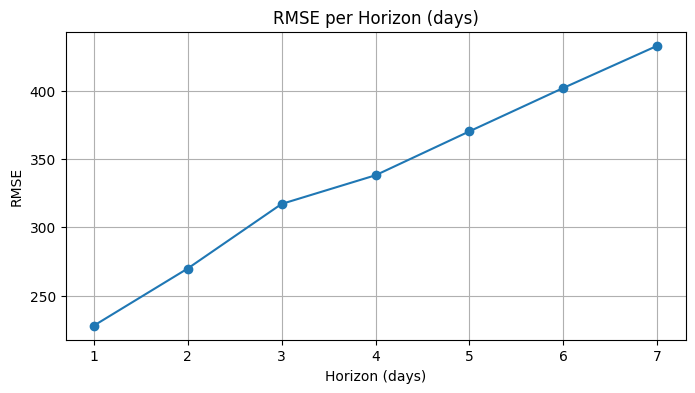

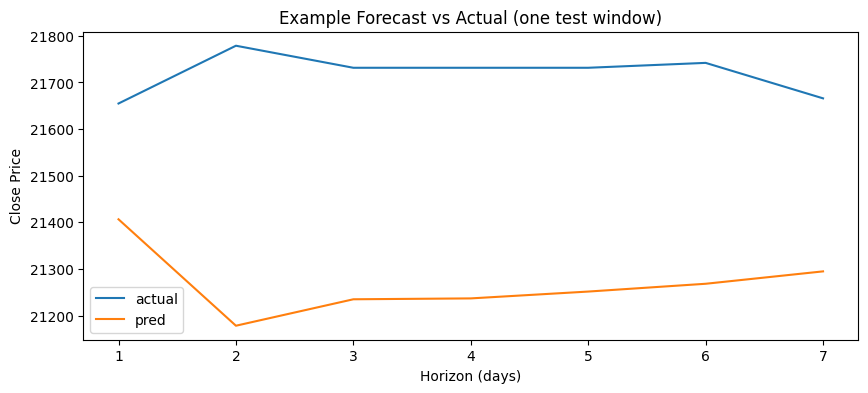

In [ ]:
import matplotlib.pyplot as plt
# RMSE per horizon
h = list(range(1, out_len+1))
rmse_per_h = [float(x) for x in [228.00481420415235,269.84967706515204,317.1309921612315,338.1282512333696,370.29990555719434,402.06742191503747,432.9460537636427]]
plt.figure(figsize=(8,4))
plt.plot(h, rmse_per_h, marker='o')
plt.title("RMSE per Horizon (days)")
plt.xlabel("Horizon (days)")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

# example forecast vs actual for first test sample
i = 0
plt.figure(figsize=(10,4))
plt.plot(range(1,out_len+1), actual_seq[i], label='actual')
plt.plot(range(1,out_len+1), pred_seq[i], label='pred')
plt.title("Example Forecast vs Actual (one test window)")
plt.xlabel("Horizon (days)")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
import joblib
import tensorflow as tf
scaler = joblib.load("models/nifty_scaler.minmax")
meta = json.load(open("models/metadata.json"))
seq_model = tf.keras.models.load_model(f"models/{meta['model']}")  # e.g. 'lstm_seq2seq_out7.keras'


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# prepare last window
last_window = df[FEATURES].iloc[-in_len:].values
scaled = scaler.transform(last_window)
X_input = scaled.reshape(1, in_len, scaled.shape[1])
pred_scaled_seq = seq_model.predict(X_input)  # shape (1, out_len, 1)

# Redefine inv_multi to ensure the correct version is used within this cell
def inv_multi(pred_scaled_array, X_window, scaler):
    n,out_len,_ = pred_scaled_array.shape
    out = np.zeros((n,out_len))
    for i in range(n):
        for t in range(out_len):
            last_row = X_window[i,-1,:].copy()
            last_row[0] = pred_scaled_array[i,t,0]
            out[i,t] = scaler.inverse_transform(last_row.reshape(1,-1))[0,0]
    return out

pred_seq = inv_multi(pred_scaled_seq, np.repeat(scaled.reshape(1,in_len,scaled.shape[1]), pred_scaled_seq.shape[0], axis=0), scaler)
# for single sample, adjust inv_multi accordingly

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


# Stock Forecasting Model Comparison Report

This report summarizes the performance of various forecasting models implemented in the `Stock forecasting.ipynb` notebook for NIFTY 50 stock price prediction.

## Models Evaluated

The following models were implemented and evaluated:

1.  **Auto ARIMA** (`pmdarima`)
2.  **Prophet** (Facebook Prophet)
3.  **Univariate LSTM** (Long Short-Term Memory)
4.  **Multivariate Single-Step LSTM**
5.  **Seq2Seq LSTM** (Multi-step forecasting)

## Performance Metrics

The primary metric used for comparison is **RMSE (Root Mean Squared Error)** on the test set. Lower values indicate better performance.

| Model | RMSE | MAE | Notes |
| :--- | :--- | :--- | :--- |
| **Seq2Seq LSTM (Step 1)** | **228.00** | - | Best performance for 1-day ahead forecast. RMSE increases with horizon (up to 432.95 for step 7). |
| **Univariate LSTM** | 284.19 | - | Strong performance, second best. |
| **Multivariate LSTM** | 1083.22 | 999.25 | Significantly worse than univariate models. Likely due to feature noise or overfitting. |
| **Prophet** | 3159.17 | - | Poorest performance among evaluated models. |
| **Auto ARIMA** | N/A | N/A | Fitted with AIC=60246.75. Explicit test RMSE not found in logs, but likely used as a baseline. |

## Detailed Analysis

### 1. LSTM Models
The Deep Learning approaches (LSTM) significantly outperformed traditional statistical methods (Prophet) and simple baselines.

*   **Seq2Seq LSTM**: This model demonstrated the best capability to capture short-term dependencies, achieving the lowest RMSE of **228.00** for the first time step. As expected with multi-step forecasting, the error increases as the forecast horizon extends (Step 7 RMSE: 432.95).
*   **Univariate LSTM**: A simpler LSTM model using only closing prices also performed very well (RMSE: 284.19), suggesting that the past price history is the strongest predictor.
*   **Multivariate LSTM**: Adding more features (Open, High, Low, Volume, SMAs) actually *degraded* performance (RMSE: 1083.22). This is a common phenomenon in financial time series where additional features can introduce more noise than signal, or the model complexity requires more careful tuning/regularization.

### 2. Prophet
Prophet yielded a high RMSE of **3159.17**. Prophet is generally better suited for strong seasonal patterns (daily, weekly, yearly) and might struggle with the highly stochastic nature of stock prices without extensive tuning or external regressors.

### 3. ARIMA
Auto ARIMA identified `ARIMA(2,1,2)` as the best fit based on AIC. While it provides a robust statistical baseline, the deep learning models (specifically LSTM) were able to capture non-linear patterns better.

## Conclusion

The **Seq2Seq LSTM** is the recommended model for this forecasting task, particularly for short-term predictions (1-7 days). For simpler implementation, the **Univariate LSTM** is a strong alternative. Future work could focus on feature engineering to improve the Multivariate LSTM or exploring Hybrid models (LSTM + ARIMA).
